<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Ford_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 5: **Ford car price prediction**

Algorithm Used: **Multiple regression,Random forest regression**

Steps:


*   Loading the dataset using pandas library
*   preprocessing the dataset.


*   Exploratory Data Analysis
*   Model building using Multiple regression Algorithm and Support vector 
    regression


*   Model testing using MSE,MAE,R2-SCORE,RMSE 







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
df=pd.read_csv('/content/ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
1,Fiesta,2019,21999,Manual,4000,Petrol,145,40.3,0.0
2,Ka+,2020,11999,Manual,2000,Petrol,145,43.5,0.0
3,KA,2018,9899,Manual,6000,Petrol,145,43.5,0.0
4,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0
...,...,...,...,...,...,...,...,...,...
17961,Mustang,2017,27890,Semi-Auto,26452,Petrol,580,23.5,5.0
17962,Mustang,2020,42999,Manual,10,Petrol,145,23.7,5.0
17963,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0
17964,Mustang,2020,40495,Semi-Auto,3200,Petrol,145,24.8,5.0


**Data Preprocessing**

In [2]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [3]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.duplicated().sum()

154

In [ ]:
#dropping duplicate values
df1 = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(17812, 9)

In [ ]:
#removing negative values
df1=df1[df1['price'] >= 0]

**Explortory Data Analysis**

<ipython-input-24-92bf47245fa0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price'],kde=False)


<Axes: xlabel='price'>

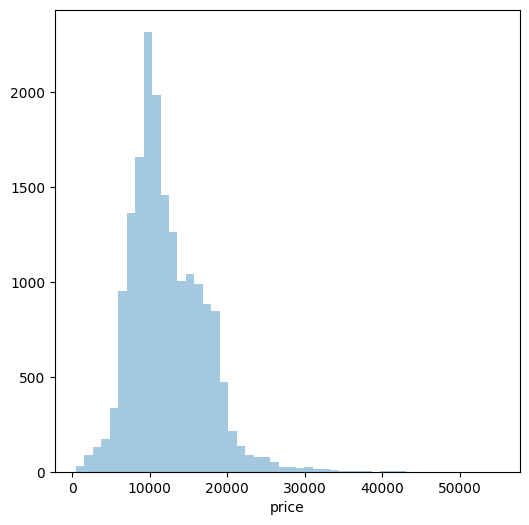

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(df1['price'],kde=False)

In [ ]:
a=df1.groupby('model')['price'].sum().reset_index()
index_to_drop=23
a=a.drop(index_to_drop)
a1=a.sort_values(by='price',ascending=False)[['model','price']].head(10)
a1

,model,price
5,Fiesta,66332283
6,Focus,60030224
13,Kuga,34928705
2,EcoSport,14052864
14,Mondeo,6276581
1,C-MAX,5373119
18,S-MAX,5190688
3,Edge,4655584
12,Ka+,4549602
8,Galaxy,4051648


<Axes: xlabel='model', ylabel='price'>

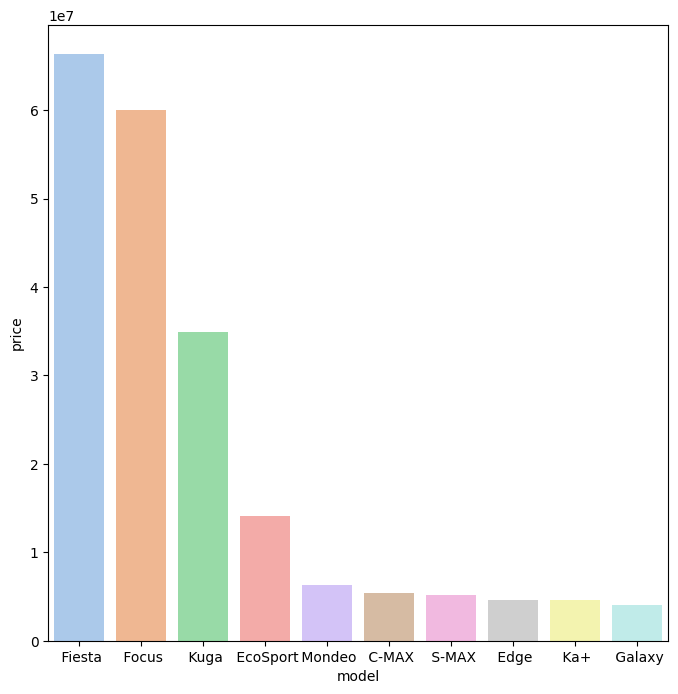

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='model',y='price',data=a1,ax=ax,palette='pastel')

In [ ]:
b=df1.groupby('year')['price'].sum().reset_index()
b1=b.sort_values(by='price')
b1=b1.drop(22)
b1

,year,price
2,2000,1995
1,1998,2699
0,1996,3000
5,2004,5744
3,2002,5785
4,2003,6189
6,2005,25488
7,2006,28634
8,2007,83314
9,2008,146342


<Axes: xlabel='year', ylabel='price'>

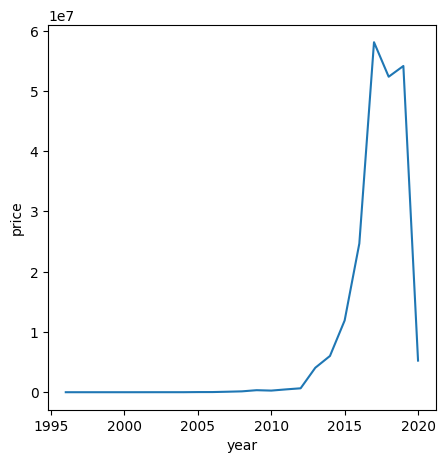

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.lineplot(x='year',y='price',data=b1,ax=ax)

In [ ]:
c=df1.groupby('transmission')['price'].sum().reset_index()
c1=c.sort_values(by='price')
c1

,transmission,price
2,Semi-Auto,16015323
0,Automatic,21262532
1,Manual,181267482


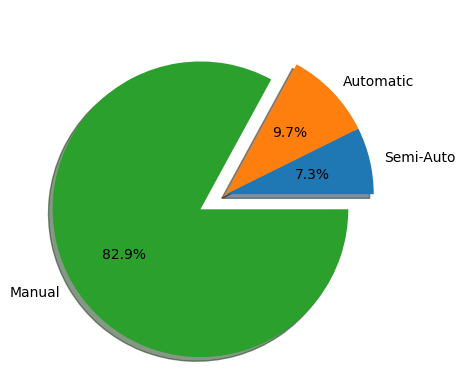

In [ ]:
y=c1['price']
labels=['Semi-Auto','Automatic','Manual']
myexplode=[0,0,0.2]
plt.pie(y,labels=labels,explode = myexplode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
d=df1.groupby('fuelType')['tax'].sum().reset_index()
d1=d.sort_values(by='tax')
d1

,fuelType,tax
1,Electric,0
3,Other,0
2,Hybrid,2215
0,Diesel,580305
4,Petrol,1435847


In [ ]:
size=[200, 400, 600, 800, 1000]
color=[1, 2, 3, 4, 5]
px.scatter(d1, x='fuelType', y='tax',size=size, color=color)

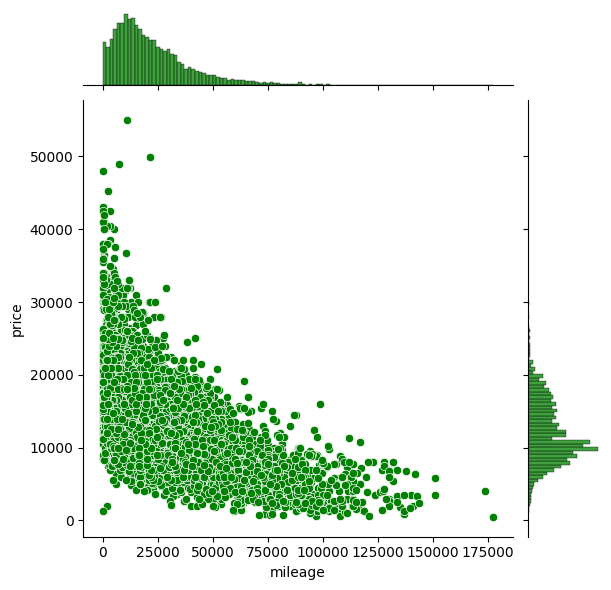

In [ ]:
sns.jointplot(data=df1, x=df1['mileage'], y=df1['price'],color='g')

<ipython-input-19-035b7e8c5d54>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

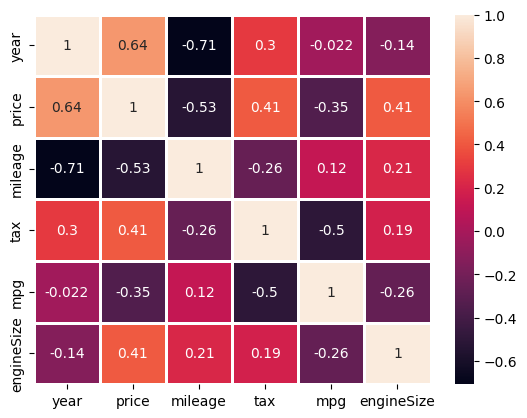

In [ ]:
sns.heatmap(df1.corr(),annot=True,linewidths=1)

**Observations**


*  More number of cars were purchased in the price range **10000** Dollars to 
   **20000** Dollars 
*   **Fiesta**, **Focus** and **kugo** are the cars in that comes under highest 
   price range in the Ford cars list.


*   The prices were high between the years **2015** to **2018**.
*   **Manual** cars are highly priced than automatic and semi auto


*   Cars that run on **petrol** gives highest tax followed by diesel and **Electric** does cars doesnot have to pay tax
*   As the mileage increases price decreases.







**Model Building**

In [28]:
X=df1.drop(['price'],axis=1)
y=df1['price']

In [38]:
le=LabelEncoder()
lst=['model','transmission','fuelType']
for i in lst:
  X[i]=le.fit_transform(X[i])

In [39]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13,2019,1,8389,4,150,35.3,0.0
1,5,2019,1,4000,4,145,40.3,0.0
2,12,2020,1,2000,4,145,43.5,0.0
3,11,2018,1,6000,4,145,43.5,0.0
4,12,2018,1,15000,4,145,43.5,0.0
...,...,...,...,...,...,...,...,...
17807,15,2017,2,26452,4,580,23.5,5.0
17808,15,2020,1,10,4,145,23.7,5.0
17809,15,2020,1,50,4,145,23.9,5.0
17810,15,2020,2,3200,4,145,24.8,5.0


In [30]:
#scaling using standard scaler
ms=MinMaxScaler()
X_ms=ms.fit_transform(X)

In [31]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ms,y,test_size=0.3,random_state=0)

In [32]:
#model building using Multiple regression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
y_pred

array([12548.90861712,  9106.24387537,  8051.36725607, ...,
       11849.31347771,  8568.45511522, 12324.32982938])

In [33]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'linear_Model':y_pred,'Random_Forest':y_pred1})
Result

,Actual Values,linear_Model,Random_Forest
2122,11450,12548.908617,11839.59
12465,8497,9106.243875,8156.26
5989,9450,8051.367256,8525.50
1243,18000,16140.979185,16850.24
16105,16500,16971.815460,16980.40
...,...,...,...
12498,8495,7431.343928,8211.09
8676,6498,7428.964502,7126.15
1530,11290,11849.313478,12422.67
12995,7499,8568.455115,7721.94


In [34]:
#model validation
import numpy as np
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 1758.779360016115
mean squared error: 6758138.433333946
root mean squared error: 2599.64198176094
r2-score: 0.7083660598390757


In [35]:
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred1=rs.predict(X_test)
y_pred1

array([11807.685,  8262.21 ,  8576.45 , ..., 12357.34 ,  7590.23 ,
       12054.12 ])

In [36]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred1))
print("mean squared error:",mean_squared_error(y_test,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score:",r2_score(y_test,y_pred1))

mean absolute error: 893.0912912656829
mean squared error: 1787591.779736941
root mean squared error: 1337.008518947034
R2 score: 0.922860053953233


Here We can see that Random forest regressor model is more efficient than Linear model.So we predict the price using Random forest regressor model.

In [44]:
y_new=rs.predict(ms.transform([[4,2020,1,10,4,150,40,2]]))
y_new

array([27198.58833333])